# Example notebook for the ATOM pipeline
---------------------------------

Download the abalone dataset from https://archive.ics.uci.edu/ml/datasets/Abalone.  
  
**Description:** Predict the age of abalone from physical measurements.

<<=============== ATOM ===============>>
Algorithm task: regression.


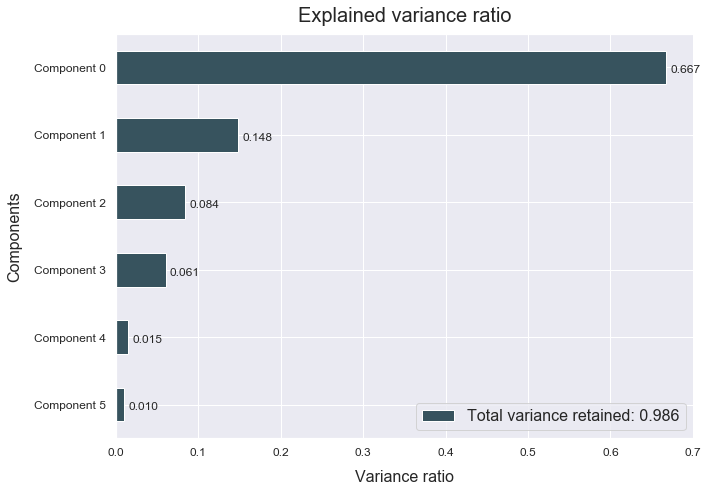

In [7]:
# Import packages
import pandas as pd
from atom import ATOMRegressor

# Load the abalone dataset
X = pd.read_csv('abalone.csv')
atom = ATOMRegressor(X, y="Rings", percentage=10, warnings=False, verbose=1)

# Encode categorical features
atom.encode()

# Apply PCA for dimensionality reduction
atom.feature_selection(strategy="pca", max_features=6)
atom.plot_PCA()

In [3]:
# Let's compare tree-based models using a successive halving approach
atom.fit(['tree', 'bag', 'et', 'rf', 'gbm', 'lgb'],
         successive_halving=True,
         metric='r2',
         max_iter=5,
         init_points=5,
         cv=1,
         bagging=5)

Processing:   0%|                                        | 0/6 [00:00<?, ?it/s]


Running pipeline =================>
Metric: r2_score


<<================ Iteration 0 ================>>
Models in pipeline: Tree, Bag, ET, RF, GBM, LGB


Processing:   0%|                                        | 0/3 [00:00<?, ?it/s]



Final results ================>>
Duration: 00h:00m:29s
Metric: r2_score
--------------------------------
Decision Tree             --> 0.104 ± 0.145
Bagging Regressor         --> 0.390 ± 0.058
Extra-Trees               --> 0.410 ± 0.082 !!
Random Forest             --> 0.284 ± 0.052
Gradient Boosting Machine --> 0.202 ± 0.034
LightGBM                  --> -0.022 ± 0.009


<<================ Iteration 1 ================>>
Models in pipeline: Bag, ET, RF


Processing:   0%|                                        | 0/1 [00:00<?, ?it/s]



Final results ================>>
Duration: 00h:00m:57s
Metric: r2_score
--------------------------------
Bagging Regressor --> 0.094 ± 0.037
Extra-Trees       --> 0.243 ± 0.041 !!
Random Forest     --> 0.143 ± 0.057


<<================ Iteration 2 ================>>
Model in pipeline: ET


Processing: 100%|████████████████████████████████| 1/1 [00:13<00:00, 13.45s/it]



Final results ================>>
Duration: 00h:01m:10s
Metric: r2_score
--------------------------------
Extra-Trees --> 0.362 ± 0.019


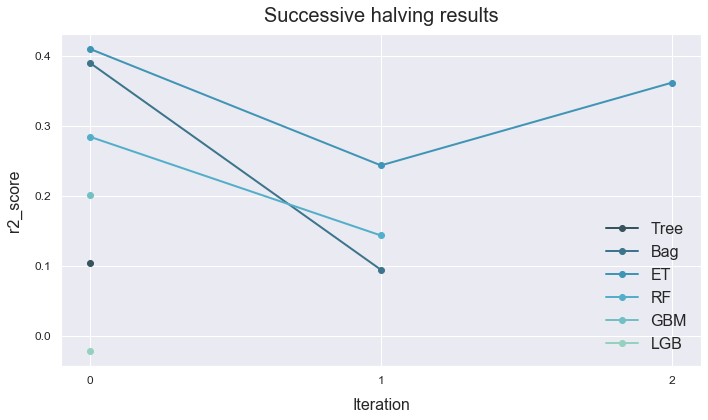

In [6]:
# Plot successive halving results
atom.plot_successive_halving()